In [4]:
%run DataCleaning.ipynb

TIME                               0
SEGMENTID                          0
BUS COUNT                          0
MESSAGE COUNT                      0
SPEED                              0
datetime                           0
name                          126557
temp                          126557
feelslike                     126557
dew                           126557
humidity                      126557
precip                        126557
precipprob                    126557
preciptype                   2306808
snow                          126557
snowdepth                     126557
windgust                      126557
windspeed                     126557
winddir                       126557
sealevelpressure              126557
cloudcover                    126557
visibility                    126557
solarradiation                126557
solarenergy                   126557
uvindex                       126557
severerisk                   2577601
conditions                    126557
i

**Applying PCA**

In [5]:
import pandas as pd

train_df = pd.read_csv('csvs/train_df.csv')
train_df.head()
test_df = pd.read_csv('csvs/test_df.csv')
test_df.head()

,SPEED,temp,feelslike,dew,humidity,precip,snowdepth,windgust,sealevelpressure,cloudcover,...,weekday,time_of_day,lat,long,is_clear,is_overcast,is_partcloud,is_rainovercase,is_snowovercast,is_snowrainovercast
0,1.066757,-0.455677,-0.623165,0.431258,0.828171,-0.196925,0.003029,1.144390,-0.445174,-1.331844,...,1.130969,-1.493682,-1.215757,-0.873503,2.674418,-0.55539,-1.083229,-0.263496,-0.029255,-0.193054
1,-0.485486,-0.140698,-0.082009,0.399871,0.359608,-0.196925,-0.487712,-1.396467,0.002900,-1.391200,...,-0.390054,1.366338,0.033644,-2.081285,2.674418,-0.55539,-1.083229,-0.263496,-0.029255,-0.193054
2,0.549343,0.120285,-0.117611,0.514958,0.171625,-0.196925,-0.487712,0.720914,-0.036636,0.649516,...,-0.390054,-1.274149,0.627958,-0.860798,-0.373913,-0.55539,0.923166,-0.263496,-0.029255,-0.193054
3,-0.097425,-1.274622,-1.228405,-1.682159,-0.502137,-0.196925,-0.487712,-0.447296,1.004475,0.375348,...,1.637976,-0.675742,-0.305560,-0.028079,-0.373913,-0.55539,0.923166,-0.263496,-0.029255,-0.193054
4,0.678696,-0.662663,-0.815417,-1.567072,-0.919516,-0.196925,0.493771,0.093001,0.253294,-1.156602,...,1.130969,0.385246,1.705085,-0.910438,-0.373913,-0.55539,0.923166,-0.263496,-0.029255,-0.193054


Removing the categorical variables

In [6]:
# Columns to be dropped
columns_to_drop = ['is_snowovercast', 'is_snowrainovercast', 'is_clear', 'is_overcast', 'is_partcloud', 'is_rainovercase']

train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)
# Display the modified DataFrame to confirm the changes
train_df.head()
test_df.head()

,SPEED,temp,feelslike,dew,humidity,precip,snowdepth,windgust,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,weekday,time_of_day,lat,long
0,1.066757,-0.455677,-0.623165,0.431258,0.828171,-0.196925,0.003029,1.144390,-0.445174,-1.331844,0.396367,-0.860609,-0.858288,-0.851394,1.130969,-1.493682,-1.215757,-0.873503
1,-0.485486,-0.140698,-0.082009,0.399871,0.359608,-0.196925,-0.487712,-1.396467,0.002900,-1.391200,0.396367,-0.860609,-0.858288,-0.851394,-0.390054,1.366338,0.033644,-2.081285
2,0.549343,0.120285,-0.117611,0.514958,0.171625,-0.196925,-0.487712,0.720914,-0.036636,0.649516,0.396367,-0.860609,-0.858288,-0.851394,-0.390054,-1.274149,0.627958,-0.860798
3,-0.097425,-1.274622,-1.228405,-1.682159,-0.502137,-0.196925,-0.487712,-0.447296,1.004475,0.375348,0.396367,0.251333,0.291477,0.176452,1.637976,-0.675742,-0.305560,-0.028079
4,0.678696,-0.662663,-0.815417,-1.567072,-0.919516,-0.196925,0.493771,0.093001,0.253294,-1.156602,0.396367,1.901979,1.920312,1.889530,1.130969,0.385246,1.705085,-0.910438


In [14]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(train_df)  # Fit PCA on the training data

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print("Components to keep:")
print(d)

Components to keep:
12


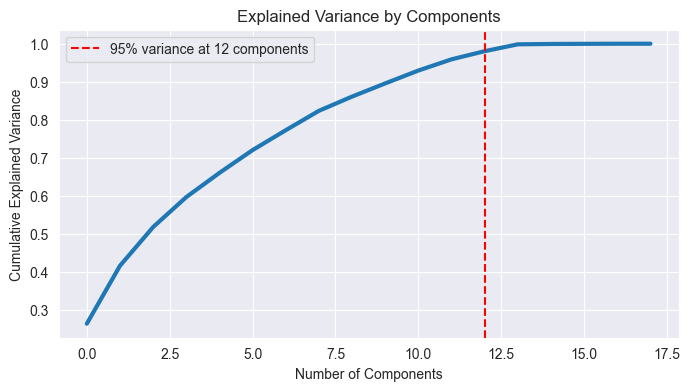

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(cumsum, linewidth=3)
plt.axvline(x=d, color='r', linestyle='--', label=f'95% variance at {d} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# TODO: edit after this line (will do on friday most likely)